In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

#from fbprophet import Prophet
#import prophet

In [2]:
os.getcwd() 

'/Users/masanoritakahashi/Documents/aqi/code'

In [3]:
df = pd.read_csv("/Users/masanoritakahashi/Documents/aqi/downloaddata/rohini_1113.csv")

In [4]:
df.head()

,location,city,country,utc,local,parameter,value,unit,latitude,longitude,attribution
0,"Rohini, Delhi - DPCC",Delhi,IN,2019-11-13T10:15:00.000Z,2019-11-13T15:45:00+05:30,pm25,410,µg/m³,28.732528,77.11992,"[{""name"":""Central Pollution Control Board"",""ur..."
1,"Rohini, Delhi - DPCC",Delhi,IN,2019-11-13T10:00:00.000Z,2019-11-13T15:30:00+05:30,pm25,410,µg/m³,28.732528,77.11992,"[{""name"":""Central Pollution Control Board"",""ur..."
2,"Rohini, Delhi - DPCC",Delhi,IN,2019-11-13T09:45:00.000Z,2019-11-13T15:15:00+05:30,pm25,410,µg/m³,28.732528,77.11992,"[{""name"":""Central Pollution Control Board"",""ur..."
3,"Rohini, Delhi - DPCC",Delhi,IN,2019-11-13T09:30:00.000Z,2019-11-13T15:00:00+05:30,pm25,410,µg/m³,28.732528,77.11992,"[{""name"":""Central Pollution Control Board"",""ur..."
4,"Rohini, Delhi - DPCC",Delhi,IN,2019-11-13T09:15:00.000Z,2019-11-13T14:45:00+05:30,pm25,415,µg/m³,28.732528,77.11992,"[{""name"":""Central Pollution Control Board"",""ur..."


In [5]:
df.tail()

,location,city,country,utc,local,parameter,value,unit,latitude,longitude,attribution
2484,"Rohini, Delhi - DPCC",Delhi,IN,2019-09-30T19:30:00.000Z,2019-10-01T01:00:00+05:30,pm25,35,µg/m³,28.732528,77.11992,"[{""name"":""Central Pollution Control Board"",""ur..."
2485,"Rohini, Delhi - DPCC",Delhi,IN,2019-09-30T19:15:00.000Z,2019-10-01T00:45:00+05:30,pm25,35,µg/m³,28.732528,77.11992,"[{""name"":""Central Pollution Control Board"",""ur..."
2486,"Rohini, Delhi - DPCC",Delhi,IN,2019-09-30T19:00:00.000Z,2019-10-01T00:30:00+05:30,pm25,38,µg/m³,28.732528,77.11992,"[{""name"":""Central Pollution Control Board"",""ur..."
2487,"Rohini, Delhi - DPCC",Delhi,IN,2019-09-30T18:45:00.000Z,2019-10-01T00:15:00+05:30,pm25,38,µg/m³,28.732528,77.11992,"[{""name"":""Central Pollution Control Board"",""ur..."
2488,"Rohini, Delhi - DPCC",Delhi,IN,2019-09-30T18:30:00.000Z,2019-10-01T00:00:00+05:30,pm25,38,µg/m³,28.732528,77.11992,"[{""name"":""Central Pollution Control Board"",""ur..."


In [6]:
df.shape

(2489, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2489 entries, 0 to 2488
Data columns (total 11 columns):
location       2489 non-null object
city           2489 non-null object
country        2489 non-null object
utc            2489 non-null object
local          2489 non-null object
parameter      2489 non-null object
value          2489 non-null int64
unit           2489 non-null object
latitude       2489 non-null float64
longitude      2489 non-null float64
attribution    2489 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 214.0+ KB


In [8]:
df.columns

Index(['location', 'city', 'country', 'utc', 'local', 'parameter', 'value',
       'unit', 'latitude', 'longitude', 'attribution'],
      dtype='object')

In [9]:
df.isnull().sum()

location       0
city           0
country        0
utc            0
local          0
parameter      0
value          0
unit           0
latitude       0
longitude      0
attribution    0
dtype: int64

In [10]:
df[["location", "local", "value"]].head()

,location,local,value
0,"Rohini, Delhi - DPCC",2019-11-13T15:45:00+05:30,410
1,"Rohini, Delhi - DPCC",2019-11-13T15:30:00+05:30,410
2,"Rohini, Delhi - DPCC",2019-11-13T15:15:00+05:30,410
3,"Rohini, Delhi - DPCC",2019-11-13T15:00:00+05:30,410
4,"Rohini, Delhi - DPCC",2019-11-13T14:45:00+05:30,415


In [11]:
df[["location", "local", "value"]].tail()

,location,local,value
2484,"Rohini, Delhi - DPCC",2019-10-01T01:00:00+05:30,35
2485,"Rohini, Delhi - DPCC",2019-10-01T00:45:00+05:30,35
2486,"Rohini, Delhi - DPCC",2019-10-01T00:30:00+05:30,38
2487,"Rohini, Delhi - DPCC",2019-10-01T00:15:00+05:30,38
2488,"Rohini, Delhi - DPCC",2019-10-01T00:00:00+05:30,38


In [12]:
city_name="pm25"
df_location=df[["location", "local", "value"]].sort_values(by='local') 
df_location["local"]=pd.to_datetime(df_location['local'].str[:-len("30:00+05:30")].str.replace("T"," "), format='%Y-%m-%d  %H:')

tmp_time=pd.date_range(start='2019-10-01 00:00', end='2019-11-13 00:00', freq='H').strftime('%Y-%m-%d %H:%M:%S')
df_tmp_time=pd.DataFrame(tmp_time, columns=["local"])
df_tmp_time["local"]=pd.to_datetime(df_tmp_time["local"])


df_location=pd.merge(df_location, df_tmp_time, on='local').drop_duplicates("local").reset_index(drop=True)

df_tmp_time["local_time"]=pd.to_datetime(df_tmp_time["local"])
df_location=pd.merge(df_location, df_tmp_time, how='right').sort_values(by='local_time') 
df_location=df_location[["value", "local_time"]]
df_location.columns=["{}".format(city_name), "local_time"]

In [13]:
df_location.head()

,pm25,local_time
0,38.0,2019-10-01 00:00:00
1,35.0,2019-10-01 01:00:00
2,31.0,2019-10-01 02:00:00
3,24.0,2019-10-01 03:00:00
4,30.0,2019-10-01 04:00:00


In [14]:
df_location.tail()

,pm25,local_time
704,448.0,2019-11-12 20:00:00
705,483.0,2019-11-12 21:00:00
706,510.0,2019-11-12 22:00:00
707,514.0,2019-11-12 23:00:00
708,544.0,2019-11-13 00:00:00


In [15]:
len(df_location)

1033

In [16]:
len(df_tmp_time)

1033

In [17]:
type(df_location["{}".format(city_name)])

pandas.core.series.Series

In [18]:
type(df_location["local_time"])

pandas.core.series.Series

//anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


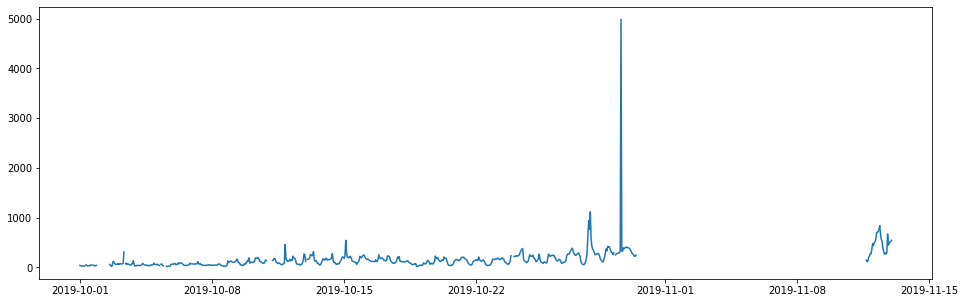

In [19]:
dataset = df_location["{}".format(city_name)].values
dataset = df_location["{}".format(city_name)].astype('float32')
dataset.index= pd.to_datetime(df_location["local_time"])
plt.figure(figsize=(16, 5))
plt.plot(dataset)

In [20]:
df_location.loc[df_location["{}".format(city_name)]>=1000, "{}".format(city_name)]=np.nan

In [21]:
'''
col=df_location["{}".format(city_name)]
# 四分位数
q1 = col.describe()['25%']
q3 = col.describe()['75%']
iqr = q3 - q1 #四分位範囲

# 外れ値の基準点
outlier_min = q1 - (iqr) * 1.5
outlier_max = q3 + (iqr) * 1.5

print(outlier_max)

# 範囲から外れている値を除く
df_location[col < outlier_min] = np.nan
df_location[col > outlier_max] = np.nan

df_location["{}".format(city_name)]=col
'''

'\ncol=df_location["{}".format(city_name)]\n# 四分位数\nq1 = col.describe()[\'25%\']\nq3 = col.describe()[\'75%\']\niqr = q3 - q1 #四分位範囲\n\n# 外れ値の基準点\noutlier_min = q1 - (iqr) * 1.5\noutlier_max = q3 + (iqr) * 1.5\n\nprint(outlier_max)\n\n# 範囲から外れている値を除く\ndf_location[col < outlier_min] = np.nan\ndf_location[col > outlier_max] = np.nan\n\ndf_location["{}".format(city_name)]=col\n'

In [22]:
df_location.isnull().sum()

pm25          326
local_time      0
dtype: int64

In [36]:
df_location[-360:-324]

,pm25,local_time
642,415.0,2019-10-29 01:00:00
643,383.0,2019-10-29 02:00:00
644,331.0,2019-10-29 03:00:00
645,300.0,2019-10-29 04:00:00
646,282.0,2019-10-29 05:00:00
647,254.0,2019-10-29 06:00:00
648,291.0,2019-10-29 07:00:00
740,NaN,2019-10-29 08:00:00
649,250.0,2019-10-29 09:00:00
650,265.0,2019-10-29 10:00:00


In [123]:
df_location.to_csv("/Users/masanoritakahashi/Documents/aqi/modefieddata/rohini_1024_pm25.csv")